In [41]:
import numpy as np
import matplotlib.pyplot as plt

## Part 1: Passive Dynamics

In [42]:
tau = 30 # time constant. ms
E_m = -70 # membrane potential. mV
g_m = 1 # membrane conductance. mS
I_ext = 20 # external current. uA

N_t = 10000 # number of time steps
delta_t = 0.1 # time step. ms

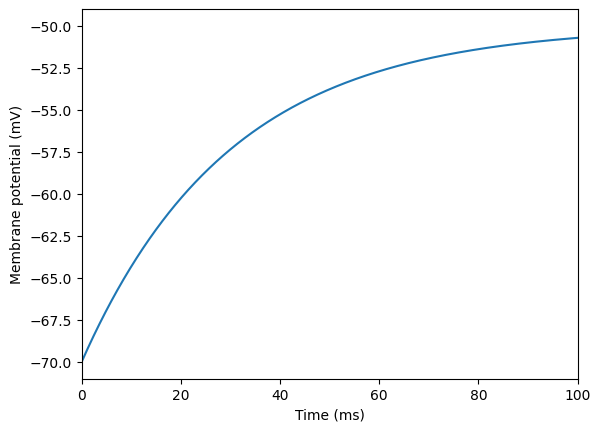

In [43]:
def passive_dynamics(tau=tau, E_m=E_m, g_m=g_m, I_ext=I_ext, N_t=N_t, delta_t=delta_t, V_0=E_m):
    V_hist = np.zeros(N_t + 1)
    V = V_0 # initial membrane potential
    V_hist[0] = V

    for i in range(1, N_t + 1):
        dV = (-(V - E_m) + I_ext / g_m) * delta_t / tau
        V += dV
        V_hist[i] = V


    t_arr = np.arange(0, N_t + 1) * delta_t
    plt.plot(t_arr, V_hist)
    plt.xlabel('Time (ms)')
    plt.ylabel('Membrane potential (mV)')

plt.figure()
passive_dynamics()
plt.xlim(0, 100) # show only the first 100 ms
plt.show()

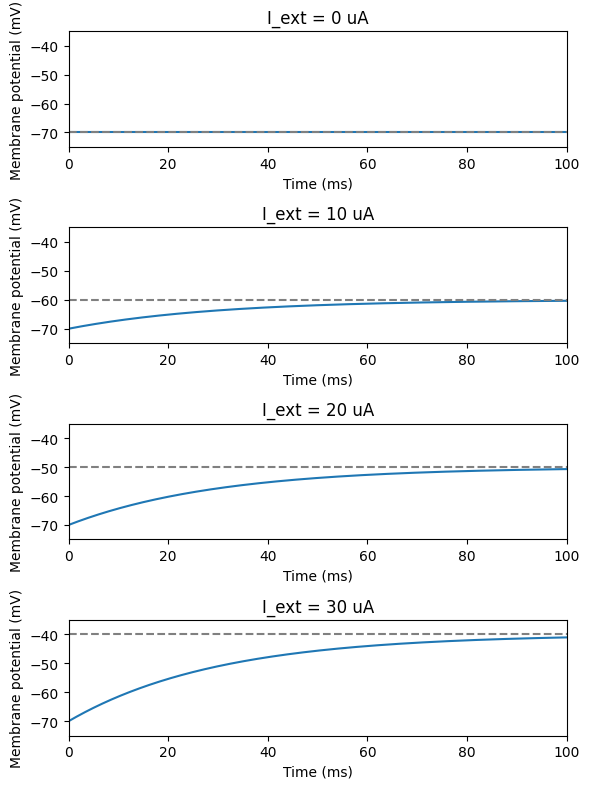

In [44]:
# Varying I_ext
fig, axes = plt.subplots(4, 1, figsize=(6, 8))
I_ext_arr = [0, 10, 20, 30]
for i, I_ext_temp in enumerate(I_ext_arr):
    plt.sca(axes[i])
    passive_dynamics(I_ext=I_ext_temp)
    plt.title(f'I_ext = {I_ext_temp} uA')
    plt.xlim(0, 100)
    plt.ylim(-75, -35)
    plt.axhline(y=E_m + I_ext_temp / g_m, color='grey', linestyle='--')
plt.tight_layout()
plt.show()

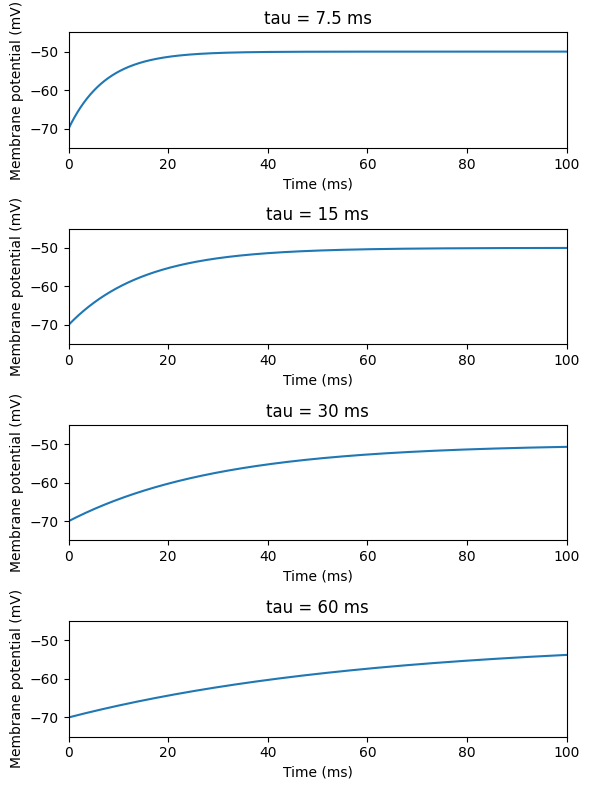

In [45]:
# Varying tau
fig, axes = plt.subplots(4, 1, figsize=(6, 8))
tau_arr = [7.5, 15, 30, 60]
for i, tau_temp in enumerate(tau_arr):
    plt.sca(axes[i])
    passive_dynamics(tau=tau_temp)
    plt.title(f'tau = {tau_temp} ms')
    plt.xlim(0, 100)
    plt.ylim(-75, -45)
plt.tight_layout()
plt.show()

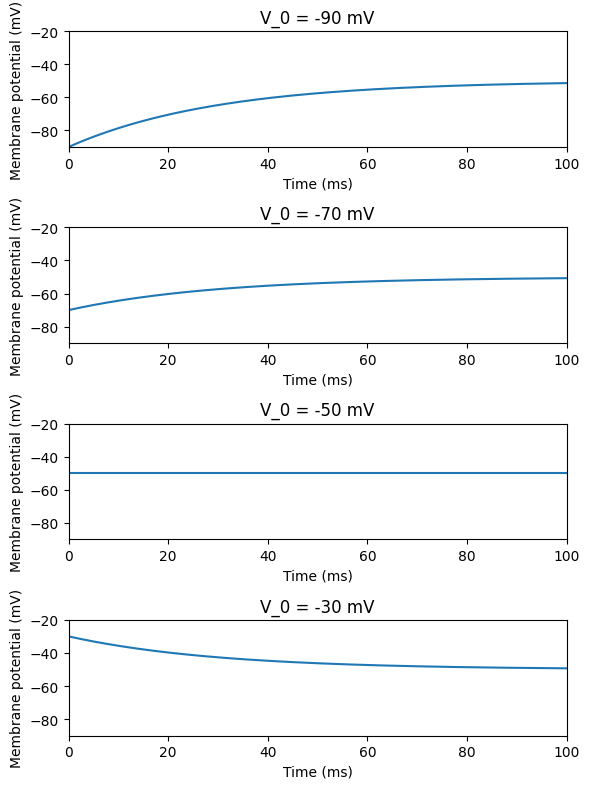

In [46]:
# Varying V_0
fig, axes = plt.subplots(4, 1, figsize=(6, 8))
V_0_arr = [-90, -70, -50, -30]
for i, V_0_temp in enumerate(V_0_arr):
    plt.sca(axes[i])
    passive_dynamics(V_0=V_0_temp)
    plt.title(f'V_0 = {V_0_temp} mV')
    plt.xlim(0, 100)
    plt.ylim(-90, -20)
plt.tight_layout()
plt.show()

What if we vary...

input current? V will converge to E_m + I_ext / g_m 

time constant? Increasing tau stretches the time scale by the same factor.

initial condition? V will converge to E_m + I_ext / g_m in a deccelerating fashion in any case. Choosing V(0) larger than the equilibrium potential qualitatively changes the curve (which then slopes downwards), but the equilibrium potential remains the same.

## Part 2: Incorporating Spiking Into the Model

In [47]:
V_thresh = -50 # threshold potential. mV
V_reset = -75 # reset potential. mV

def spiking_dynamics(tau=tau, E_m=E_m, g_m=g_m, I_ext=I_ext, N_t=N_t, delta_t=delta_t, V_0=E_m, V_thresh=V_thresh, V_reset=V_reset):
    V_hist = np.zeros(N_t + 1)
    V = V_0 # initial membrane potential
    V_hist[0] = V
    spike_times = []

    for i in range(1, N_t + 1):
        dV = (-(V - E_m) + I_ext / g_m) * delta_t / tau
        V += dV

        if V > V_thresh:
            V = V_reset
            spike_times.append(i * delta_t)
            
        V_hist[i] = V

    t_arr = np.arange(0, N_t + 1) * delta_t
    plt.plot(t_arr, V_hist)
    plt.xlabel('Time (ms)')
    plt.ylabel('Membrane potential (mV)')

    return spike_times

In [67]:
# For aesthetics, we can mark spike times with vertical lines in our plots
def plot_spikes(spike_times, ymin=V_reset, ymax=0):
    plt.vlines(x=spike_times, ymin=ymin, ymax=ymax)

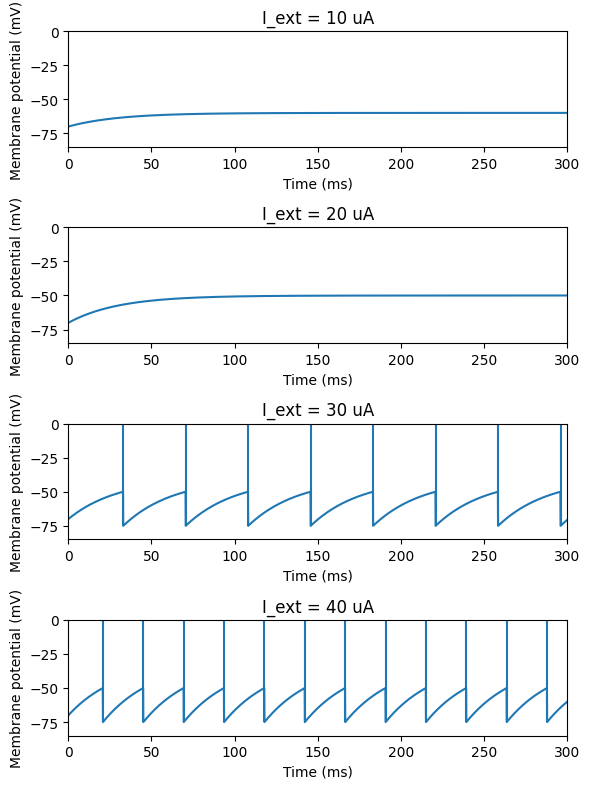

In [68]:
# Vary I_ext
fig, axes = plt.subplots(4, 1, figsize=(6, 8))
I_ext_arr = [10, 20, 30, 40]
for i, I_ext_temp in enumerate(I_ext_arr):
    plt.sca(axes[i])
    spike_times = spiking_dynamics(I_ext=I_ext_temp)
    plot_spikes(spike_times)
    plt.title(f'I_ext = {I_ext_temp} uA')
    plt.xlim(0, 300) # show only the first 300 ms
    plt.ylim(-85, 0)
plt.tight_layout()
plt.show()

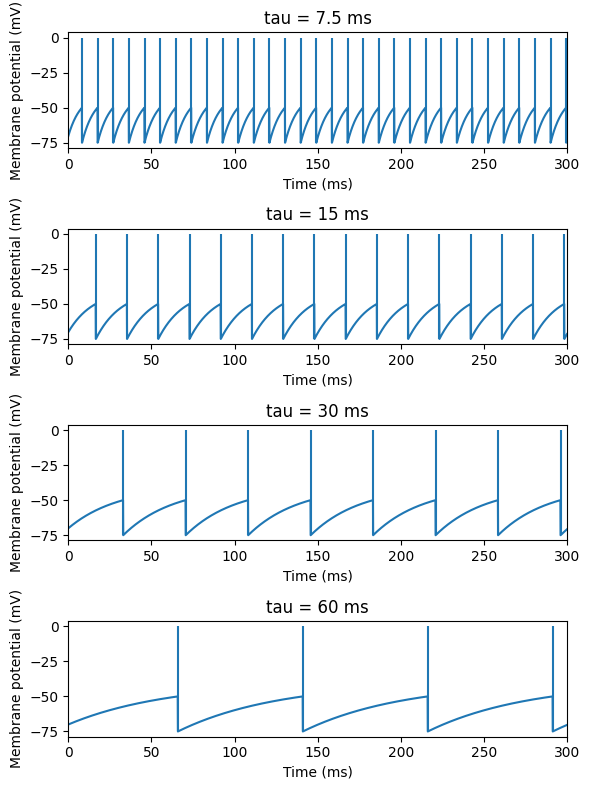

In [69]:
# Vary tau
fig, axes = plt.subplots(4, 1, figsize=(6, 8))
tau_arr = [7.5, 15, 30, 60]
for i, tau_temp in enumerate(tau_arr):
    plt.sca(axes[i])
    spike_times = spiking_dynamics(tau=tau_temp, I_ext=30)
    plot_spikes(spike_times)
    plt.title(f'tau = {tau_temp} ms')
    plt.xlim(0, 300)
plt.tight_layout()
plt.show()

## Part 3: Adding Noise to the Input

[]

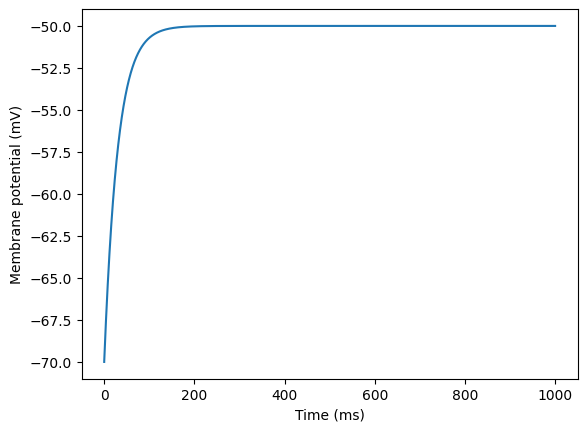

In [70]:
spiking_dynamics(V_thresh=float('inf')) # no spike. np.inf also works.

In [71]:
sigma = 50 # noise level. mV

def noisy_dynamics(tau=tau, E_m=E_m, g_m=g_m, I_0=I_ext, N_t=N_t, delta_t=delta_t, V_0=E_m, V_thresh=V_thresh, V_reset=V_reset, sigma=sigma):
    V_hist = np.zeros(N_t + 1)
    V = V_0 # initial membrane potential
    V_hist[0] = V

    time_since_last_spike = 0 # time since the last spike. ms
    num_spikes = 0 # number of spikes
    spike_times = [] # spike times

    for i in range(1, N_t + 1):

        noise_term = sigma * np.random.randn() # add noise to external current

        dV = (-(V - E_m) + (I_0 + (1 / np.sqrt(delta_t)) * noise_term) / g_m) * delta_t / tau
        V += dV

        if V > V_thresh:
            V = V_reset
            num_spikes += 1
            spike_times.append(i * delta_t)
            
        V_hist[i] = V

    t_arr = np.arange(0, N_t + 1) * delta_t
    plt.plot(t_arr, V_hist)
    plt.xlabel('Time (ms)')
    plt.ylabel('Membrane potential (mV)')

    return spike_times

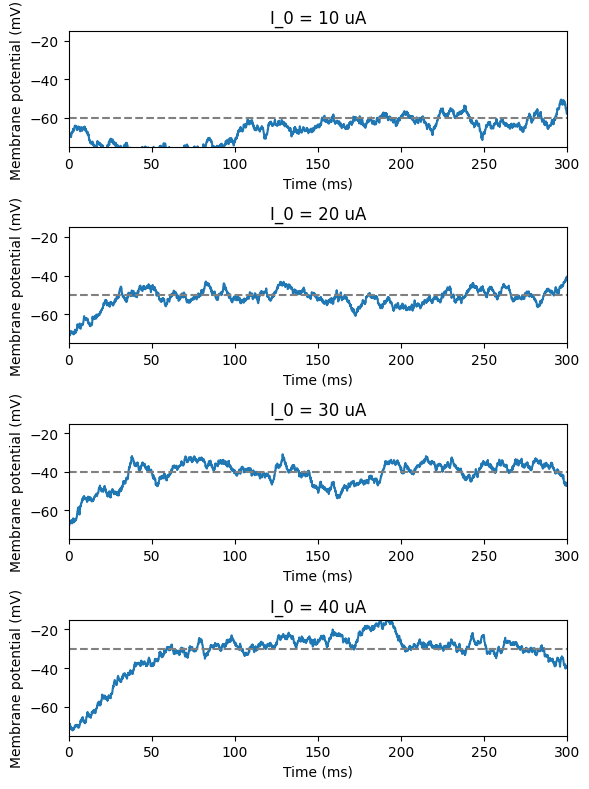

In [72]:
# Vary I_0
fig, axes = plt.subplots(4, 1, figsize=(6, 8))
I_0_arr = [10, 20, 30, 40]
for i, I_0_temp in enumerate(I_0_arr):
    plt.sca(axes[i])
    spike_times = noisy_dynamics(I_0=I_0_temp, V_thresh=float('inf'))
    inter_spike_hist = np.diff(spike_times)
    plt.title(f'I_0 = {I_0_temp} uA')
    plt.xlim(0, 300) # show only the first 100 ms
    plt.ylim(-75, -15)
    plt.axhline(y=E_m + I_0_temp / g_m, color='grey', linestyle='--')
plt.tight_layout()
plt.show()

How will the noise affect spiking?

You would expect larger values of $\sigma$ to do 2 things: Increase the spike rate (as large deviations from $I_0$ may quickly result in a spike) and increase the variability of inter-spike intervals (as the time taken to reach the threshold potential will be less predictable).

Re-introduce spiking

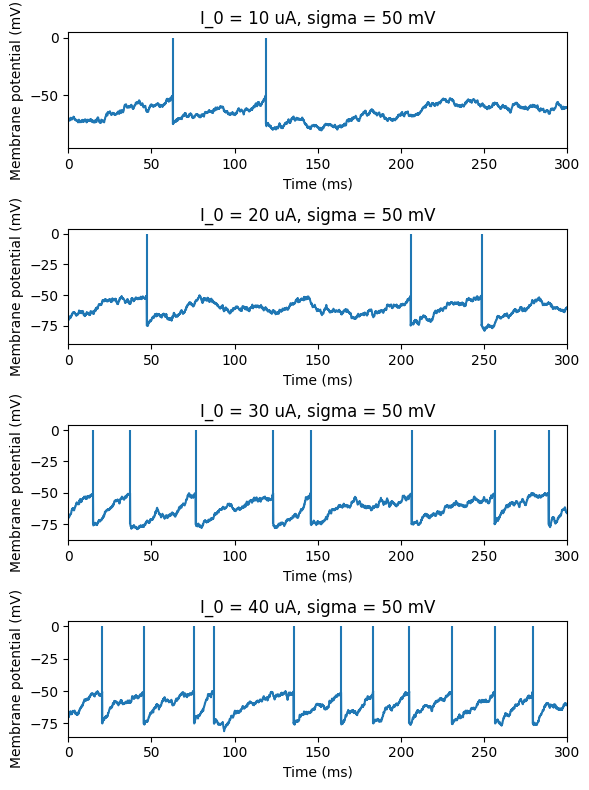

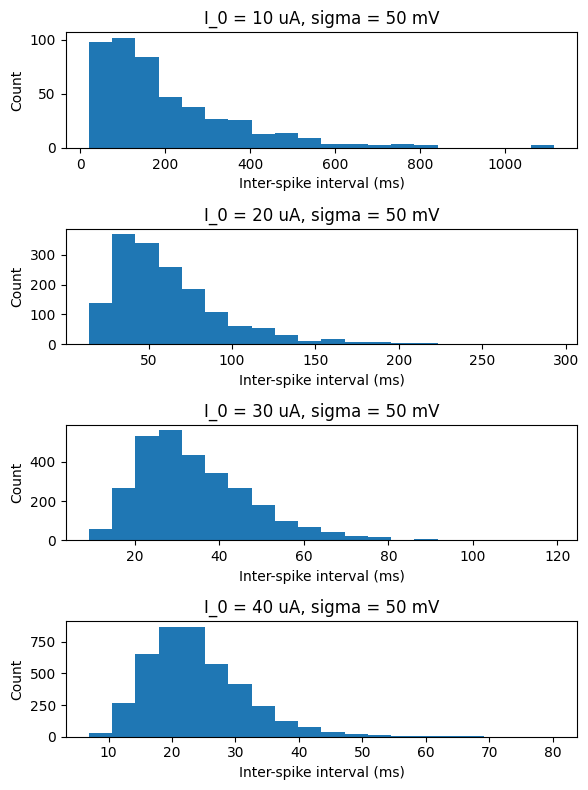

In [74]:
inter_spike_hists = []

# Vary I_0 with spiking dynamics
fig, axes = plt.subplots(4, 1, figsize=(6, 8))
I_0_arr = [10, 20, 30, 40]
for i, I_0_temp in enumerate(I_0_arr):
    plt.sca(axes[i])
    spike_times = noisy_dynamics(I_0=I_0_temp, N_t=1000000)
    inter_spike_hist = np.diff(spike_times)
    inter_spike_hists.append(inter_spike_hist)
    plot_spikes(spike_times)
    plt.title(f'I_0 = {I_0_temp} uA, sigma = {sigma} mV')
    plt.xlim(0, 300) # show only the first 300 ms
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(4, 1, figsize=(6, 8))
for i, inter_spike_hist in enumerate(inter_spike_hists):
    plt.sca(axes[i])
    plt.hist(inter_spike_hist, bins=20)
    plt.xlabel('Inter-spike interval (ms)')
    plt.ylabel('Count')
    plt.title(f'I_0 = {I_0_arr[i]} uA, sigma = {sigma} mV')
plt.tight_layout()
plt.show()

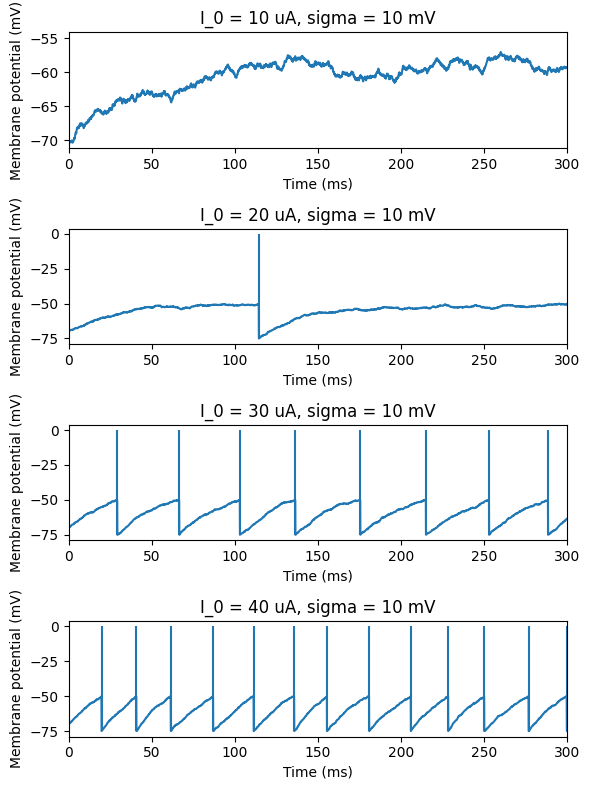

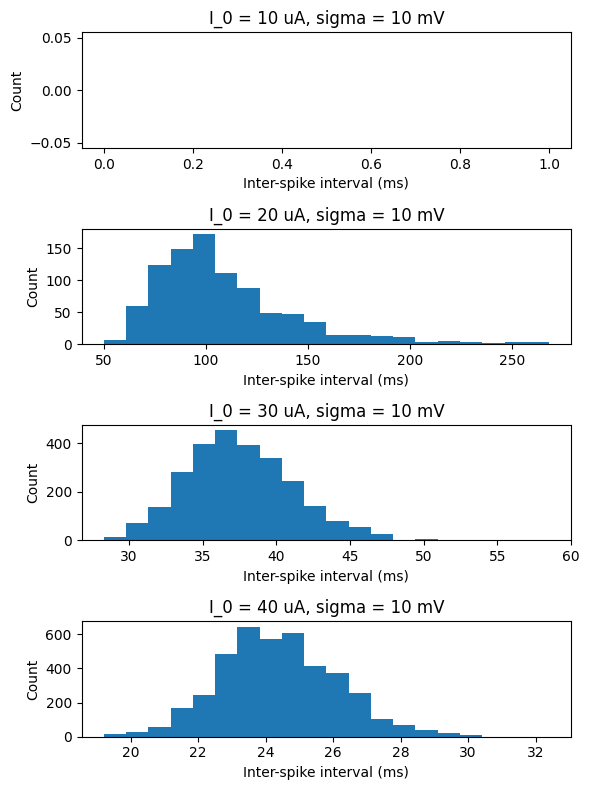

In [75]:
# Repeat varying I_0 with sigma = 10 instead of 50
inter_spike_hists = []

fig, axes = plt.subplots(4, 1, figsize=(6, 8))
I_0_arr = [10, 20, 30, 40]
for i, I_0_temp in enumerate(I_0_arr):
    plt.sca(axes[i])
    spike_times = noisy_dynamics(I_0=I_0_temp, sigma=10, N_t=1000000)
    inter_spike_hist = np.diff(spike_times)
    inter_spike_hists.append(inter_spike_hist)
    plot_spikes(spike_times)
    plt.title(f'I_0 = {I_0_temp} uA, sigma = 10 mV')
    plt.xlim(0, 300) # show only the first 300 ms
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(4, 1, figsize=(6, 8))
for i, inter_spike_hist in enumerate(inter_spike_hists):
    plt.sca(axes[i])
    plt.hist(inter_spike_hist, bins=20)
    plt.xlabel('Inter-spike interval (ms)')
    plt.ylabel('Count')
    plt.title(f'I_0 = {I_0_arr[i]} uA, sigma = 10 mV')
plt.tight_layout()
plt.show()

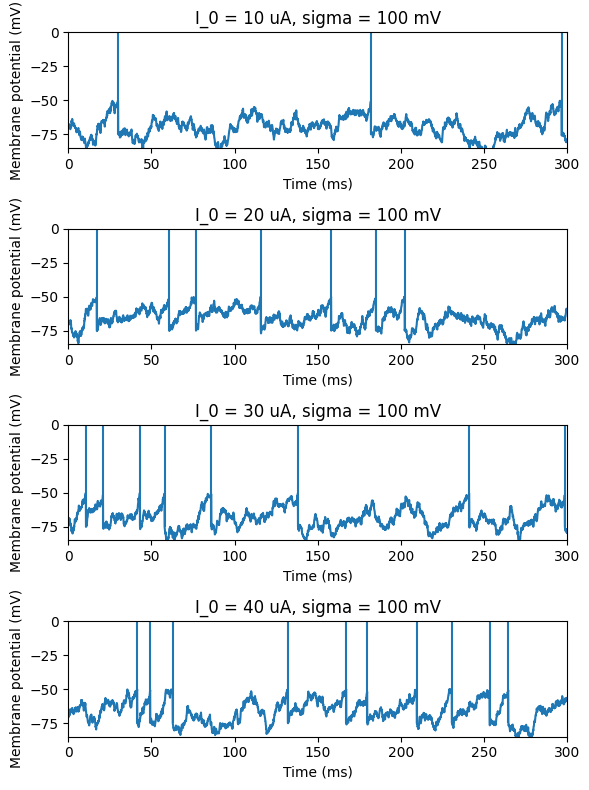

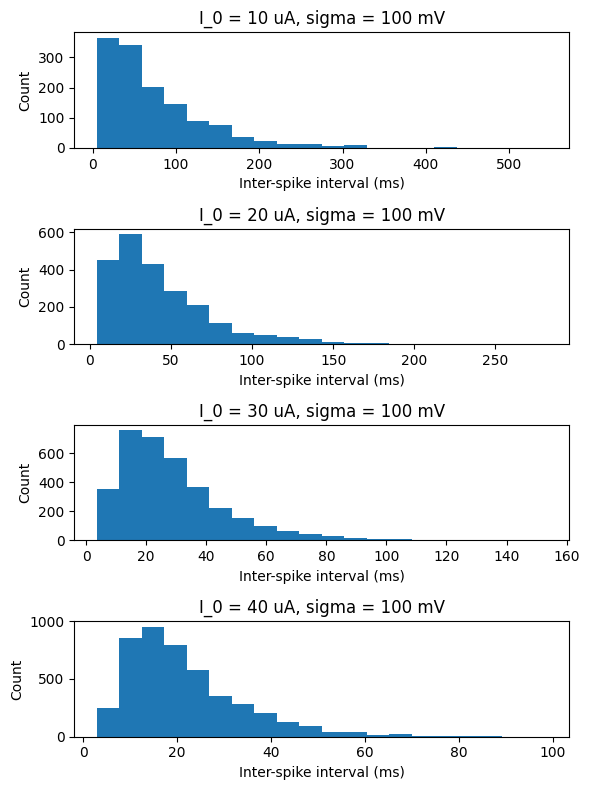

In [79]:
# Repeat varying I_0 with sigma = 100 instead of 50
inter_spike_hists = []

fig, axes = plt.subplots(4, 1, figsize=(6, 8))
I_0_arr = [10, 20, 30, 40]
for i, I_0_temp in enumerate(I_0_arr):
    plt.sca(axes[i])
    spike_times = noisy_dynamics(I_0=I_0_temp, sigma=100, N_t=1000000)
    inter_spike_hist = np.diff(spike_times)
    inter_spike_hists.append(inter_spike_hist)
    plot_spikes(spike_times)
    plt.title(f'I_0 = {I_0_temp} uA, sigma = 100 mV')
    plt.xlim(0, 300) # show only the first 100 ms
    plt.ylim(-85, 0)
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(4, 1, figsize=(6, 8))
for i, inter_spike_hist in enumerate(inter_spike_hists):
    plt.sca(axes[i])
    plt.hist(inter_spike_hist, bins=20)
    plt.xlabel('Inter-spike interval (ms)')
    plt.ylabel('Count')
    plt.title(f'I_0 = {I_0_arr[i]} uA, sigma = 100 mV')
plt.tight_layout()
plt.show()

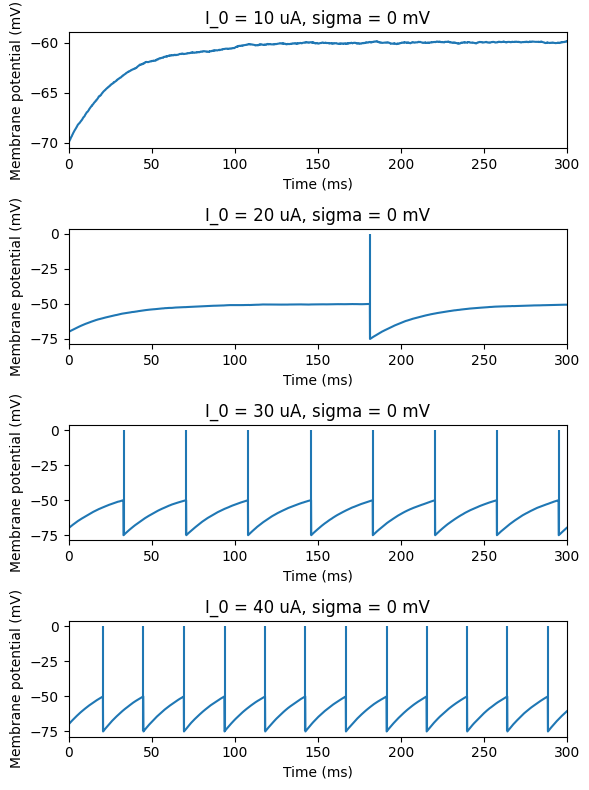

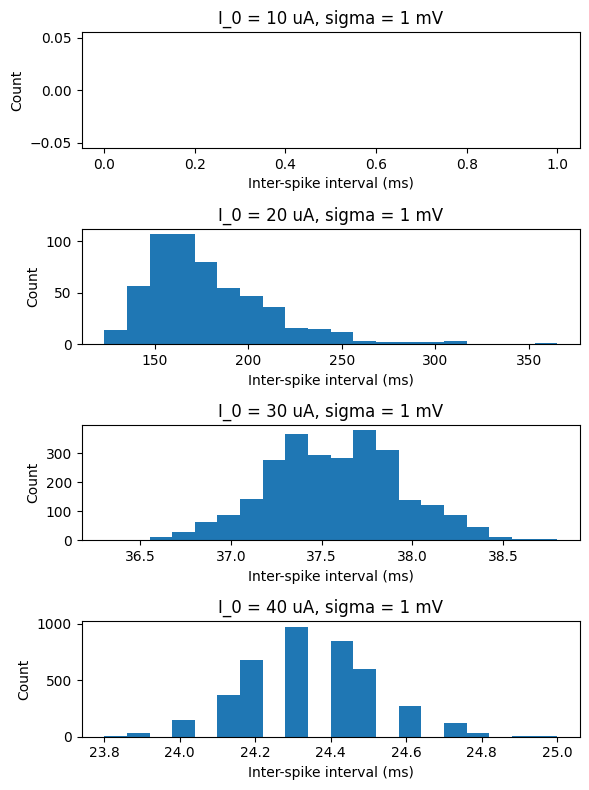

In [78]:
# Repeat varying I_0 with sigma = 0 instead of 50
inter_spike_hists = []

fig, axes = plt.subplots(4, 1, figsize=(6, 8))
I_0_arr = [10, 20, 30, 40]
for i, I_0_temp in enumerate(I_0_arr):
    plt.sca(axes[i])
    spike_times = noisy_dynamics(I_0=I_0_temp, sigma=1, N_t=1000000)
    inter_spike_hist = np.diff(spike_times)
    inter_spike_hists.append(inter_spike_hist)
    plot_spikes(spike_times)
    plt.title(f'I_0 = {I_0_temp} uA, sigma = 0 mV')
    plt.xlim(0, 300) # show only the first 300 ms
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(4, 1, figsize=(6, 8))
for i, inter_spike_hist in enumerate(inter_spike_hists):
    plt.sca(axes[i])
    plt.hist(inter_spike_hist, bins=20)
    plt.xlabel('Inter-spike interval (ms)')
    plt.ylabel('Count')
    plt.title(f'I_0 = {I_0_arr[i]} uA, sigma = 1 mV')
plt.tight_layout()
plt.show()

So how does the shape of the ISP histogram depend on $I_0$ and $\sigma$?

There are two edge cases:
- When sigma is 0, the histogram consists of a single bar, as the neuron fires at regular intervals.
  
- When sigma is very large (relative to $I_0$) the neuron will, on any time step, be very likely to either receive no excitatory input OR enough input to immediately fire -- where the corresponding probabilities depend on $I_0$. Its spikes will thus essentially come from a Poisson process. In that case, the ISIs are the "waiting times of a Poisson process". It then follows (mathematically) that the ISI histogram will resemble the probability density function of an exponential distribution.

If $I_0$ is fixed, increasing sigma will gradually transform the ISI histogram from a unimodal towards an exponential distribution. Vice versa, increasing $I_0$ will shorten the ISIs, shifting the histogram to the left. Further, lowering $I_0$ drives the histogram towards an exponential distribution.